# CHILDES French: Age vs Function Word Proportion

In [30]:
import os
import csv
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [31]:
# List of CSV files to process
# function_files_50 = []  # Uses _function50.csv files
# function_files_100 = []  # Uses _function100.csv files
function_files_all = ['Anae_function.csv', 'Anais_function.csv', 'Anne_function.csv', 'Antoine_function.csv', 'Champaud_function.csv', 'Geneva_function.csv', 'Lea_function.csv', 'Leonard_function.csv', 'Leveille_function.csv', 'Madeleine_function.csv', 'Marie_function.csv', 'Marilyn_function.csv', 'Max_function.csv', 'Nathan_function.csv', 'Theophile_function.csv', 'Theotime_function.csv']  # Uses _function.csv files

# Initialize a 2D array to store Spearman's rho values for each CSV file
# spearman_rhos_50 = []
# spearman_rhos_100 = []
spearman_rhos_all = []

# Load the original _mlu.csv files to get ages (they are the only files that have the corresponding ages for each transcript)
age_files = ['Anae_mlu.csv', 'Anais_mlu.csv', 'Anne_mlu.csv', 'Antoine_mlu.csv', 'Champaud_mlu.csv', 'Geneva_mlu.csv', 'Lea_mlu.csv', 'Leonard_mlu.csv', 'Leveille_mlu.csv', 'Madeleine_mlu.csv', 'Marie_mlu.csv', 'Marilyn_mlu.csv', 'Max_mlu.csv', 'Nathan_mlu.csv', 'Theophile_mlu.csv', 'Theotime_mlu.csv']

In [32]:
def age_in_months(age_str):
    parts = age_str.split(';')
    if len(parts) == 2:  # Example Format: "2;11.28", "2;05.", or "3;"
        years = int(parts[0])
        months_and_days = parts[1].split('.')
        
        # Handle cases where days are not provided
        if months_and_days[0] == '':
            months = 0  # Assume 00 months if no months are provided
        else:
            months = float(months_and_days[0])
        
        # Check if the month format ends with a dot, indicating missing days
        if len(months_and_days) > 1 and months_and_days[1] == '':
            days = 0  # Assume 00 days if no days are provided
        else:
            days = float(months_and_days[1]) if len(months_and_days) > 1 else 0
        
        months += days / 30  # Keep decimal for days
        return years * 12 + months
    return 0  # Consider raising an error instead of returning 0 for invalid formats

In [33]:
def age_function_plots(function_files, spearman_rhos, age_files):
    age_data = {}

    for age_file in age_files:
        if os.path.exists(age_file):
            with open(age_file, 'r', encoding='utf-8') as file:
                reader = csv.DictReader(file)
                data = list(reader)
                # Store ages in a dictionary with the base filename as the key
                for entry in data:
                    base_filename = entry['File'].split('.')[0]  # Get the base filename
                    age_data[base_filename] = age_in_months(entry['Age'])  # Store the age

    for function_file in function_files:
        # Check if the file exists before attempting to open it
        if os.path.exists(function_file):
            with open(function_file, 'r', encoding='utf-8') as file:
                reader = csv.DictReader(file)
                data = list(reader)

            # Initialize list to hold chosen transcripts and their function word proportions
            chosen_transcripts = []
            transcript_list = []
            time_steps = []  # New list to hold time steps

            # Select the first transcript
            if data:  # Check if there is any data
                first_data = data[0]
                # Extract the base filename to get the corresponding age
                base_filename = first_data['File'].split('.')[0]
                first_age = age_data.get(base_filename, 0)  # Get the corresponding age or default to 0
                chosen_transcripts.append((first_age, float(first_data['Function Word Proportion'])))
                transcript_list.append(first_data['File'])  # Collect the first transcript name

                last_chosen_age = first_age

                # Select subsequent transcripts that are at least 1 month apart
                for entry in data[1:]:  # Start from the second transcript
                    base_filename = entry['File'].split('.')[0]
                    current_age = age_data.get(base_filename, 0)  # Get the corresponding age or default to 0
                    if current_age - last_chosen_age >= 1:
                        chosen_transcripts.append((current_age, float(entry['Function Word Proportion'])))  # Collect age and function word proportion
                        transcript_list.append(entry['File'])  # Collect the transcript name
                        time_steps.append(current_age - last_chosen_age)  # Calculate time step without rounding
                        last_chosen_age = current_age

            # Plot Age vs Function Word Proportion
            ages = [t[0] for t in chosen_transcripts]
            function_word_proportions = [t[1] for t in chosen_transcripts]

            plt.figure(figsize=(10, 5))
            plt.scatter(ages, function_word_proportions, marker='o')  # scatter plot
            plt.title(f'Age vs Function Word Proportion for {function_file}')
            plt.xlabel('Age (months)')
            plt.ylabel('Function Word Proportion')
            plt.grid()
            plt.show()       

            # Calculate Spearman's rho
            if len(ages) > 1:  # Ensure there are enough data points
                spearman_corr, _ = spearmanr(ages, function_word_proportions)
                spearman_rhos.append([function_file, spearman_corr])  # Store the file name and Spearman's rho value
                print(f"Spearman's rho for {function_file}: {spearman_corr:.4f}\n")

            # Print the list of chosen transcripts, converted ages, and time steps
            print(f"Chosen Transcripts for {function_file}: \n", transcript_list, "\n")
            print(f"Function Word Proportions for {function_file}: \n", function_word_proportions, "\n")  # Print the function word proportions
            print(f"Ages for {function_file}: \n", ages, "\n")  # Print the converted ages
            print(f"Time Steps for {function_file}: \n", time_steps, "\n")  # Print the time steps

## Age vs Function Word Proportion (50 Utterances)

In [34]:
age_function_plots(function_files_50, spearman_rhos_50, age_files)

## Age vs Function Word Proportion (100 Utterances)

In [35]:
age_function_plots(function_files_100, spearman_rhos_100, age_files)

## Age vs Function Word Proportion (All Utterances)

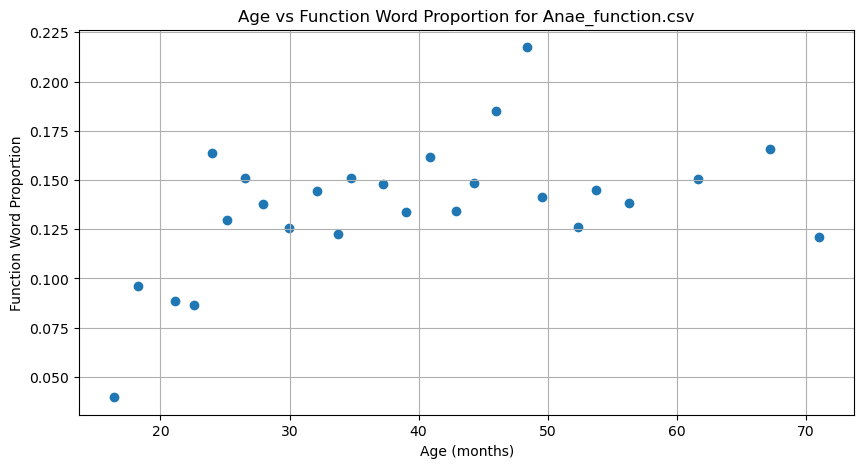

Spearman's rho for Anae_function.csv: 0.4243

Chosen Transcripts for Anae_function.csv: 
 ['010413.cha', '010608.cha', '010904.cha', '011017.cha', '020000.cha', '020105.cha', '020216.cha', '020329.cha', '020529.cha', '020804.cha', '020923.cha', '021023.cha', '030107.cha', '030300.cha', '030427.cha', '030626.cha', '030809.cha', '031000.cha', '040012.cha', '040117.cha', '040410.cha', '040523.cha', '040808.cha', '050120.cha', '050706.cha', '051030.cha'] 

Function Word Proportions for Anae_function.csv: 
 [0.03968253968253968, 0.09621451104100946, 0.08860759493670886, 0.08637236084452975, 0.1639496972519795, 0.12945166760881854, 0.15102639296187684, 0.13805970149253732, 0.1255585344057194, 0.1442241968557758, 0.12242182302062542, 0.15099135739705136, 0.14807692307692308, 0.13354459031235855, 0.16167448574521834, 0.1341614906832298, 0.1486417221937468, 0.18513689700130379, 0.21743486973947895, 0.14132231404958678, 0.12609238451935081, 0.14510894761242465, 0.13837994214079075, 0.15032397408

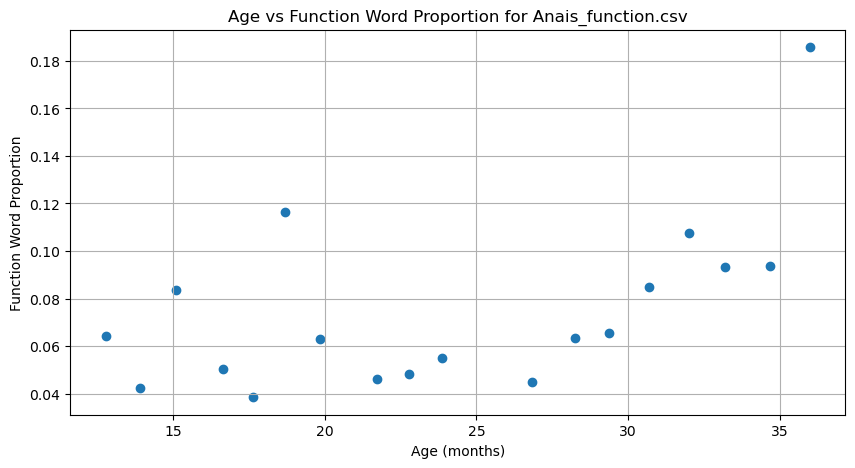

Spearman's rho for Anais_function.csv: 0.5542

Chosen Transcripts for Anais_function.csv: 
 ['10023a.cha', '10127a.cha', '10303a.cha', '10419a.cha', '10519a.cha', '10621a.cha', '10725a.cha', '10922a.cha', '11023a.cha', '11126a.cha', '20225a.cha', '20407a.cha', '20511a.cha', '20621a.cha', '20800a.cha', '20906a.cha', '21020a.cha', '30000a.cha'] 

Function Word Proportions for Anais_function.csv: 
 [0.06417112299465241, 0.04218362282878412, 0.0835117773019272, 0.050314465408805034, 0.038461538461538464, 0.11627906976744186, 0.06282722513089005, 0.046153846153846156, 0.048316251830161056, 0.05505952380952381, 0.04478827361563518, 0.06318956870611836, 0.0654849827671098, 0.08503401360544217, 0.10751565762004175, 0.09346846846846847, 0.0936270653029111, 0.18576779026217227] 

Ages for Anais_function.csv: 
 [12.766666666666667, 13.9, 15.1, 16.633333333333333, 17.633333333333333, 18.7, 19.833333333333332, 21.733333333333334, 22.766666666666666, 23.866666666666667, 26.833333333333332, 28.233333

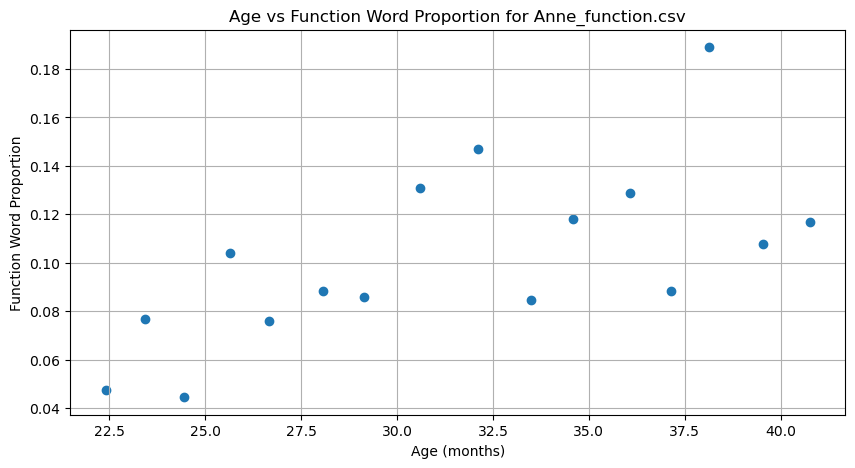

Spearman's rho for Anne_function.csv: 0.6794

Chosen Transcripts for Anne_function.csv: 
 ['011012.cha', '011113.cha', '020013.cha', '020119.cha', '020220.cha', '020402.cha', '020504.cha', '020618.cha', '020803.cha', '020915.cha', '021018.cha', '030002.cha', '030104.cha', '030204.cha', '030316.cha', '030423.cha'] 

Function Word Proportions for Anne_function.csv: 
 [0.047619047619047616, 0.07692307692307693, 0.044444444444444446, 0.1041890440386681, 0.07600434310532031, 0.08838643371017471, 0.08605072463768115, 0.13076199435559738, 0.14694656488549618, 0.0845771144278607, 0.1181462140992167, 0.12885326757090013, 0.08852005532503458, 0.1890303623898139, 0.10763358778625955, 0.11688311688311688] 

Ages for Anne_function.csv: 
 [22.4, 23.433333333333334, 24.433333333333334, 25.633333333333333, 26.666666666666668, 28.066666666666666, 29.133333333333333, 30.6, 32.1, 33.5, 34.6, 36.06666666666667, 37.13333333333333, 38.13333333333333, 39.53333333333333, 40.766666666666666] 

Time Steps for A

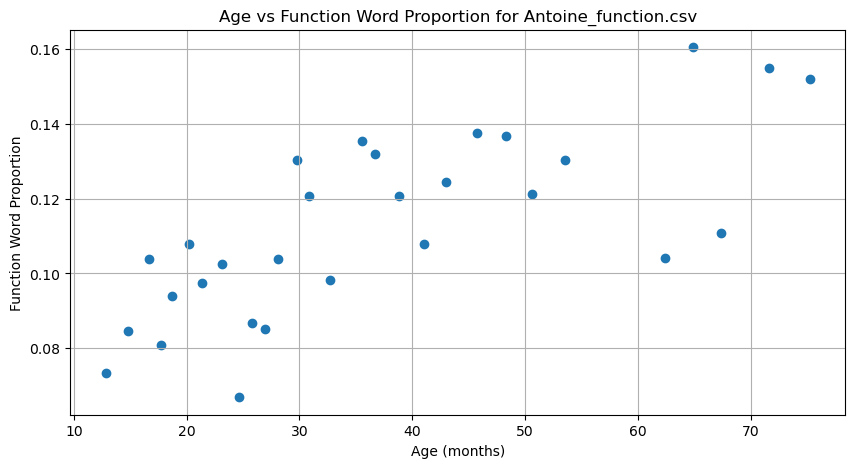

Spearman's rho for Antoine_function.csv: 0.7852

Chosen Transcripts for Antoine_function.csv: 
 ['010024.cha', '010224.cha', '010419.cha', '010521.cha', '010622.cha', '010805.cha', '010911.cha', '011104.cha', '020020.cha', '020123.cha', '020227.cha', '020403.cha', '020524.cha', '020624.cha', '020820.cha', '021116.cha', '030021.cha', '030224.cha', '030500.cha', '030701.cha', '030922.cha', '040009.cha', '040219.cha', '040516.cha', '050213.cha', '050428.cha', '050711.cha', '051118.cha', '060308.cha'] 

Function Word Proportions for Antoine_function.csv: 
 [0.07342378292098962, 0.08469055374592833, 0.10378912685337727, 0.08094186902133922, 0.09384615384615384, 0.10793650793650794, 0.09730538922155689, 0.10260014054813774, 0.06686701728024042, 0.08672798948751642, 0.0851063829787234, 0.10387469084913438, 0.13043478260869565, 0.1207335710646969, 0.09832134292565947, 0.1353476821192053, 0.1319032405294386, 0.12061994609164421, 0.10790067720090293, 0.12438057482656095, 0.13767518549051938, 0.1

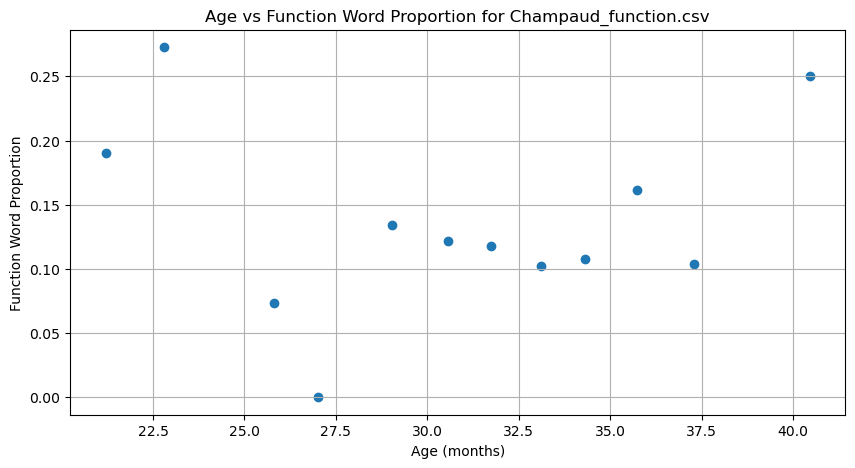

Spearman's rho for Champaud_function.csv: -0.0280

Chosen Transcripts for Champaud_function.csv: 
 ['010906x.cha', '011024x.cha', '020124x.cha', '020300x.cha', '020501.cha', '020617x.cha', '020722x.cha', '020903x.cha', '021009x.cha', '021122x.cha', '030109x.cha', '030414x.cha'] 

Function Word Proportions for Champaud_function.csv: 
 [0.19047619047619047, 0.2727272727272727, 0.07317073170731707, 0.0, 0.13391739674593242, 0.12177121771217712, 0.11764705882352941, 0.10256410256410256, 0.10784313725490197, 0.16129032258064516, 0.10416666666666667, 0.25] 

Ages for Champaud_function.csv: 
 [21.2, 22.8, 25.8, 27.0, 29.03333333333333, 30.566666666666666, 31.733333333333334, 33.1, 34.3, 35.733333333333334, 37.3, 40.46666666666667] 

Time Steps for Champaud_function.csv: 
 [1.6000000000000014, 3.0, 1.1999999999999993, 2.0333333333333314, 1.533333333333335, 1.1666666666666679, 1.3666666666666671, 1.1999999999999957, 1.4333333333333371, 1.5666666666666629, 3.1666666666666714] 



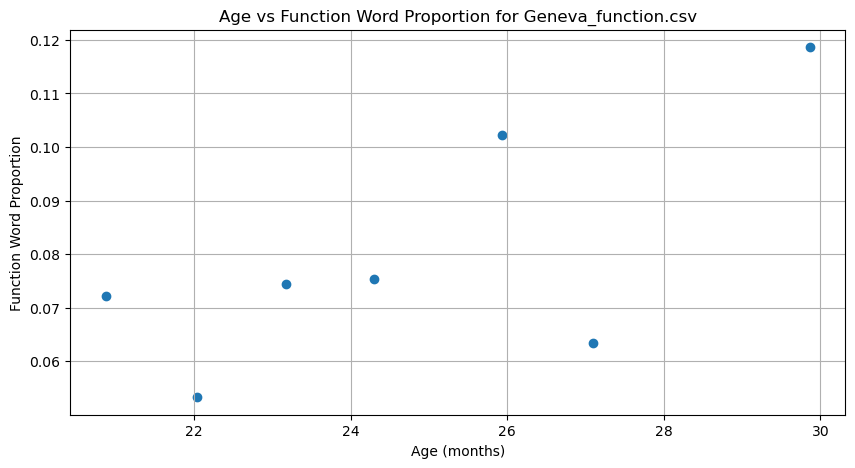

Spearman's rho for Geneva_function.csv: 0.5714

Chosen Transcripts for Geneva_function.csv: 
 ['010826.cha', '011001.cha', '011105.cha', '020009.cha', '020128.cha', '020303.cha', '020526.cha'] 

Function Word Proportions for Geneva_function.csv: 
 [0.07222699914015478, 0.05327868852459016, 0.07434944237918216, 0.07529162248144221, 0.10221354166666667, 0.06343283582089553, 0.11862835959221502] 

Ages for Geneva_function.csv: 
 [20.866666666666667, 22.03333333333333, 23.166666666666664, 24.3, 25.933333333333334, 27.1, 29.866666666666667] 

Time Steps for Geneva_function.csv: 
 [1.1666666666666643, 1.1333333333333329, 1.1333333333333364, 1.6333333333333329, 1.1666666666666679, 2.7666666666666657] 



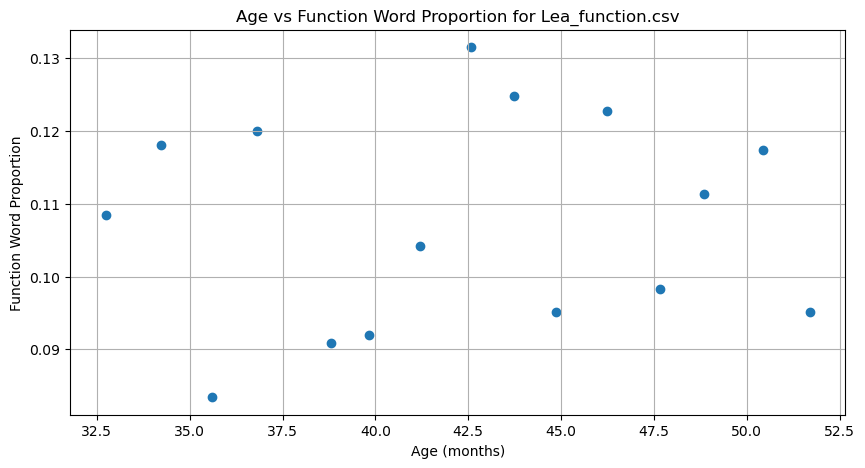

Spearman's rho for Lea_function.csv: 0.0929

Chosen Transcripts for Lea_function.csv: 
 ['020822.cha', '021007.cha', '021118.cha', '030024.cha', '030224.cha', '030325.cha', '030506.cha', '030617.cha', '030722.cha', '030826.cha', '031007.cha', '031120.cha', '040025.cha', '040213.cha', '040321.cha'] 

Function Word Proportions for Lea_function.csv: 
 [0.10849349039057657, 0.11813842482100238, 0.08342133051742344, 0.12007277137659188, 0.09090909090909091, 0.09196234612599566, 0.10414827890556046, 0.13153310104529617, 0.12488262910798122, 0.09517923362175525, 0.12280701754385964, 0.09836065573770492, 0.11128903122497999, 0.11744186046511627, 0.0950965824665676] 

Ages for Lea_function.csv: 
 [32.733333333333334, 34.233333333333334, 35.6, 36.8, 38.8, 39.833333333333336, 41.2, 42.56666666666666, 43.733333333333334, 44.86666666666667, 46.233333333333334, 47.666666666666664, 48.833333333333336, 50.43333333333334, 51.7] 

Time Steps for Lea_function.csv: 
 [1.5, 1.3666666666666671, 1.1999999999

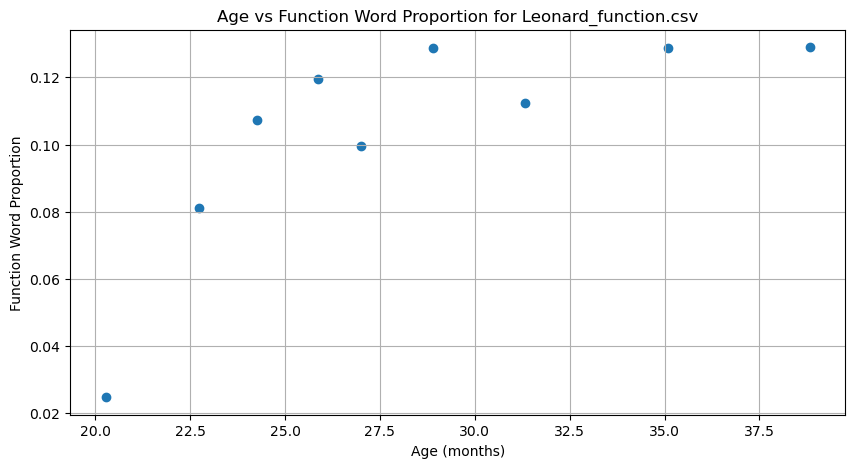

Spearman's rho for Leonard_function.csv: 0.8833

Chosen Transcripts for Leonard_function.csv: 
 ['010808.cha', '011022.cha', '020008.cha', '020126.cha', '020300.cha', '020427.cha', '020710.cha', '021103.cha', '030225.cha'] 

Function Word Proportions for Leonard_function.csv: 
 [0.024793388429752067, 0.08118433619866285, 0.10717299578059072, 0.11936758893280633, 0.09955947136563877, 0.1286624203821656, 0.11241217798594848, 0.12866958151155528, 0.12897526501766785] 

Ages for Leonard_function.csv: 
 [20.266666666666666, 22.733333333333334, 24.266666666666666, 25.866666666666667, 27.0, 28.9, 31.333333333333332, 35.1, 38.833333333333336] 

Time Steps for Leonard_function.csv: 
 [2.4666666666666686, 1.5333333333333314, 1.6000000000000014, 1.1333333333333329, 1.8999999999999986, 2.4333333333333336, 3.7666666666666693, 3.7333333333333343] 



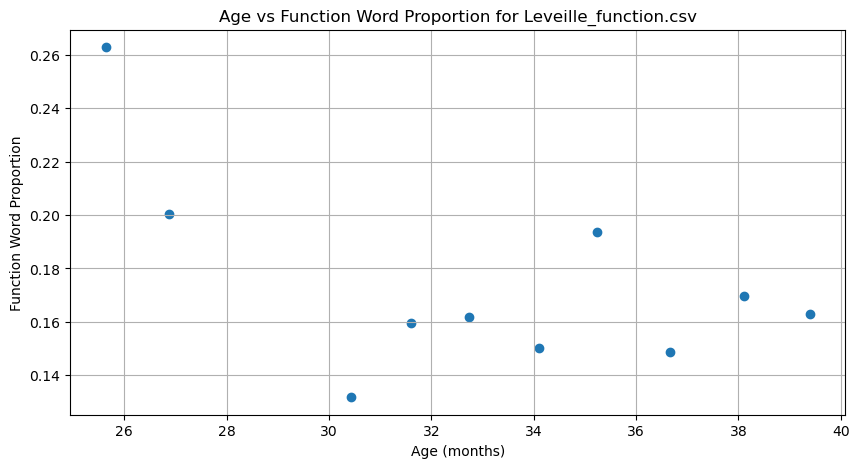

Spearman's rho for Leveille_function.csv: -0.2121

Chosen Transcripts for Leveille_function.csv: 
 ['020119.cha', '020226.cha', '020613.cha', '020718.cha', '020822.cha', '021003.cha', '021107.cha', '030020.cha', '030203.cha', '030312.cha'] 

Function Word Proportions for Leveille_function.csv: 
 [0.2628898790579249, 0.20055555555555554, 0.13172966781214204, 0.1596958174904943, 0.16184971098265896, 0.15028901734104047, 0.19363997728563317, 0.14873239436619717, 0.16949752300070772, 0.16304952698942682] 

Ages for Leveille_function.csv: 
 [25.633333333333333, 26.866666666666667, 30.433333333333334, 31.6, 32.733333333333334, 34.1, 35.233333333333334, 36.666666666666664, 38.1, 39.4] 

Time Steps for Leveille_function.csv: 
 [1.2333333333333343, 3.5666666666666664, 1.1666666666666679, 1.1333333333333329, 1.3666666666666671, 1.1333333333333329, 1.43333333333333, 1.4333333333333371, 1.2999999999999972] 



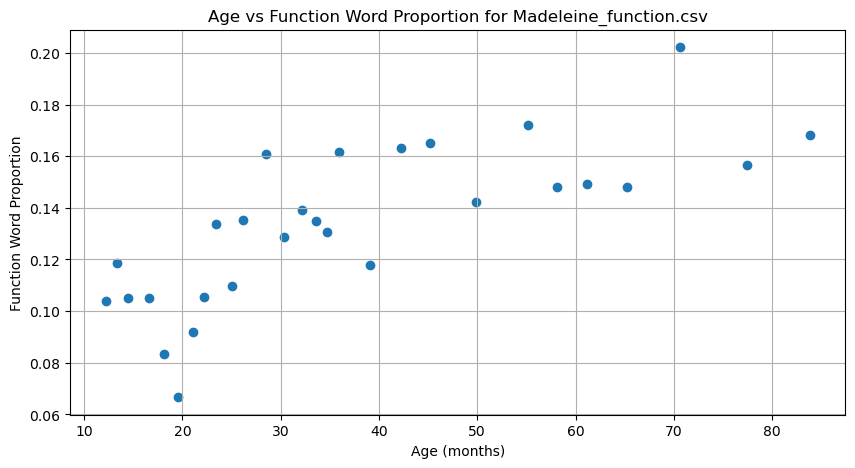

Spearman's rho for Madeleine_function.csv: 0.8281

Chosen Transcripts for Madeleine_function.csv: 
 ['010005.cha', '010110.cha', '010214.cha', '010418.cha', '010604.cha', '010715.cha', '010903.cha', '011007.cha', '011113.cha', '020102.cha', '020206.cha', '020415.cha', '020610.cha', '020805.cha', '020916.cha', '021020.cha', '030028.cha', '030302.cha', '030608.cha', '030907.cha', '040127.cha', '040704.cha', '041003.cha', '050105.cha', '050508.cha', '051018.cha', '060504.cha', '061126.cha'] 

Function Word Proportions for Madeleine_function.csv: 
 [0.10394060536836093, 0.11845102505694761, 0.10526315789473684, 0.10510732790525537, 0.08338804990151018, 0.06666666666666667, 0.09193870752831446, 0.10564159292035398, 0.13361344537815126, 0.10984455958549223, 0.13509544787077826, 0.16085106382978723, 0.12877871825876663, 0.13906976744186048, 0.135, 0.1306340718105424, 0.16176470588235295, 0.1178432462479155, 0.16322701688555347, 0.16521739130434782, 0.1423324150596878, 0.17190305206463197, 0.1

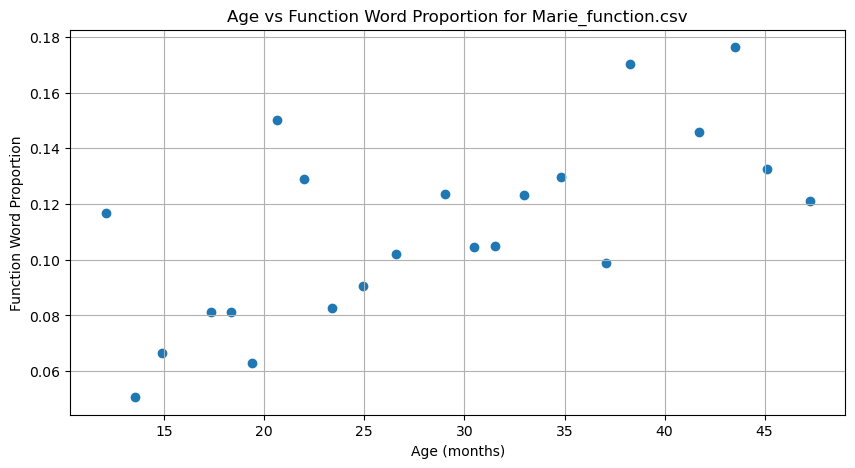

Spearman's rho for Marie_function.csv: 0.6578

Chosen Transcripts for Marie_function.csv: 
 ['10002.cha', '10116a.cha', '10227a.cha', '10510a.cha', '10610a.cha', '10712a.cha', '10819a.cha', '11000a.cha', '11111a.cha', '20028a.cha', '20217a.cha', '20501a.cha', '20614a.cha', '20716a.cha', '20900a.cha', '21024a.cha', '30102a.cha', '30208a.cha', '30521a.cha', '30716a.cha', '30904a.cha', '31108a.cha'] 

Function Word Proportions for Marie_function.csv: 
 [0.11684518013631938, 0.050666666666666665, 0.06643356643356643, 0.08108108108108109, 0.08139534883720931, 0.06296296296296296, 0.15012106537530268, 0.12903225806451613, 0.08266666666666667, 0.09052333804809053, 0.1021978021978022, 0.12343470483005367, 0.10454065469904963, 0.10502793296089385, 0.1232876712328767, 0.12957157784743992, 0.09878213802435724, 0.1700844390832328, 0.14597544338335608, 0.1762652705061082, 0.13254437869822486, 0.12100840336134454] 

Ages for Marie_function.csv: 
 [12.066666666666666, 13.533333333333333, 14.9, 17.333

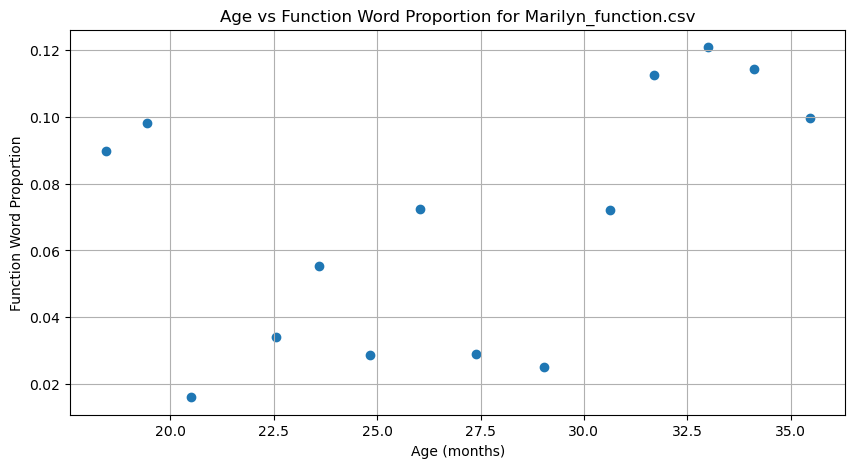

Spearman's rho for Marilyn_function.csv: 0.4901

Chosen Transcripts for Marilyn_function.csv: 
 ['10613a.cha', '10703b.cha', '10815a.cha', '11017a.cha', '11118a.cha', '20025a.cha', '20201a.cha', '20312a.cha', '20501a.cha', '20619a.cha', '20721a.cha', '20900a.cha', '21003a.cha', '21114a.cha'] 

Function Word Proportions for Marilyn_function.csv: 
 [0.08982035928143713, 0.09803921568627451, 0.0160857908847185, 0.03424657534246575, 0.05536912751677853, 0.028831562974203338, 0.0724191063174114, 0.02905811623246493, 0.02518891687657431, 0.07212925562608194, 0.11261261261261261, 0.12083847102342787, 0.11435331230283911, 0.09952038369304557] 

Ages for Marilyn_function.csv: 
 [18.433333333333334, 19.433333333333334, 20.5, 22.566666666666666, 23.6, 24.833333333333332, 26.03333333333333, 27.4, 29.03333333333333, 30.633333333333333, 31.7, 33.0, 34.1, 35.46666666666667] 

Time Steps for Marilyn_function.csv: 
 [1.0, 1.0666666666666664, 2.0666666666666664, 1.033333333333335, 1.2333333333333307, 1.

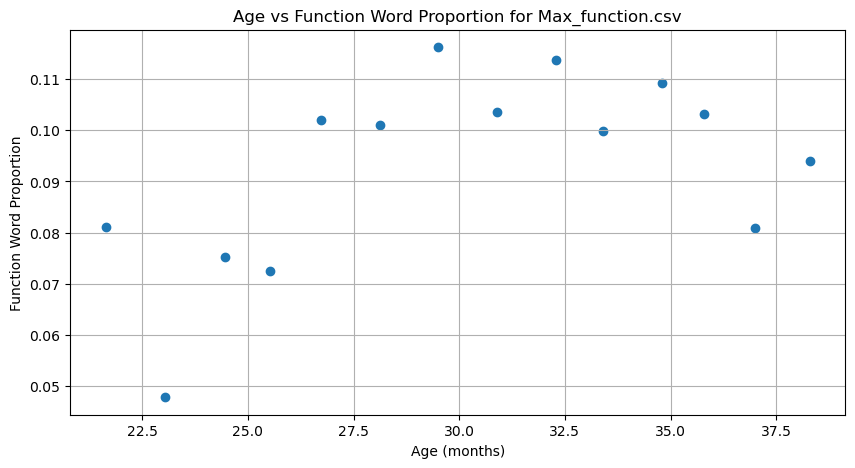

Spearman's rho for Max_function.csv: 0.3978

Chosen Transcripts for Max_function.csv: 
 ['010919.cha', '011101.cha', '020014.cha', '020116.cha', '020222.cha', '020404.cha', '020515.cha', '020627.cha', '020809.cha', '020912.cha', '021024.cha', '021124.cha', '030100.cha', '030209.cha'] 

Function Word Proportions for Max_function.csv: 
 [0.08101851851851852, 0.04785276073619632, 0.07523148148148148, 0.07253269916765755, 0.10198675496688742, 0.10104529616724739, 0.11621966794380588, 0.10355987055016182, 0.11375, 0.09987029831387809, 0.10920034393809114, 0.10310965630114566, 0.08098891730605286, 0.09395973154362416] 

Ages for Max_function.csv: 
 [21.633333333333333, 23.03333333333333, 24.466666666666665, 25.53333333333333, 26.733333333333334, 28.133333333333333, 29.5, 30.9, 32.3, 33.4, 34.8, 35.8, 37.0, 38.3] 

Time Steps for Max_function.csv: 
 [1.3999999999999986, 1.4333333333333336, 1.0666666666666664, 1.2000000000000028, 1.3999999999999986, 1.3666666666666671, 1.3999999999999986, 1.39

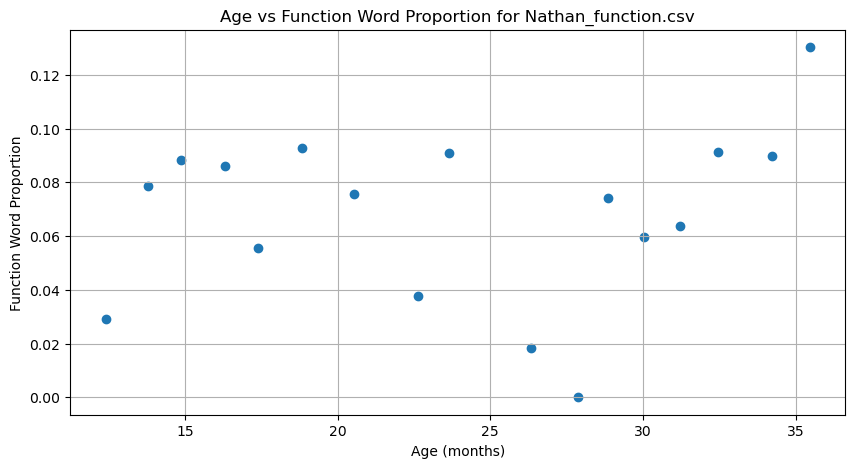

Spearman's rho for Nathan_function.csv: 0.2279

Chosen Transcripts for Nathan_function.csv: 
 ['10012a.cha', '10124a.cha', '10226a.cha', '10409a.cha', '10512a.cha', '10625a.cha', '10816a.cha', '11019a.cha', '11119a.cha', '20210a.cha', '20326a.cha', '20426a.cha', '20601a.cha', '20706a.cha', '20814a.cha', '21007a.cha', '21114a.cha'] 

Function Word Proportions for Nathan_function.csv: 
 [0.02926829268292683, 0.07865168539325842, 0.08823529411764706, 0.08620689655172414, 0.05555555555555555, 0.09266409266409266, 0.07553956834532374, 0.03773584905660377, 0.09090909090909091, 0.018145161290322582, 0.0, 0.07430997876857749, 0.05980861244019139, 0.0636604774535809, 0.09116809116809117, 0.08977035490605428, 0.13030746705710103] 

Ages for Nathan_function.csv: 
 [12.4, 13.8, 14.866666666666667, 16.3, 17.4, 18.833333333333332, 20.53333333333333, 22.633333333333333, 23.633333333333333, 26.333333333333332, 27.866666666666667, 28.866666666666667, 30.03333333333333, 31.2, 32.46666666666667, 34.23333

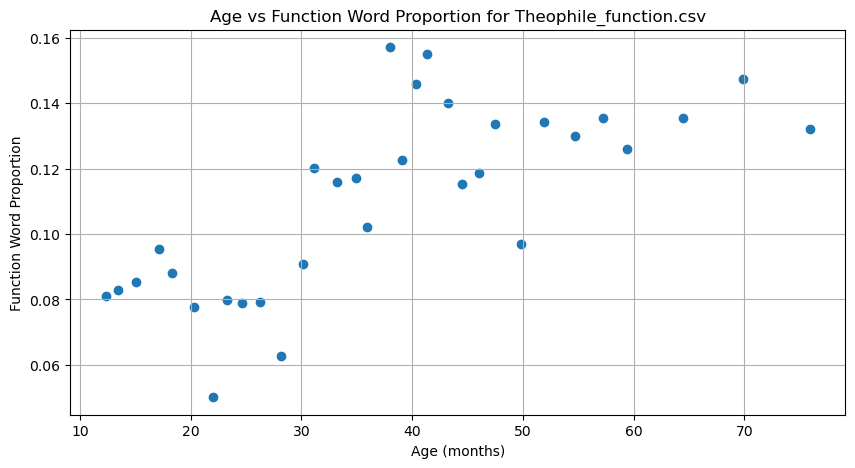

Spearman's rho for Theophile_function.csv: 0.7559

Chosen Transcripts for Theophile_function.csv: 
 ['010009.cha', '010114.cha', '010302.cha', '010505.cha', '010608.cha', '010808.cha', '011000.cha', '011107.cha', '020020.cha', '020208.cha', '020405.cha', '020603.cha', '020704.cha', '020907.cha', '021027.cha', '021128.cha', '030200.cha', '030302.cha', '030410.cha', '030511.cha', '030708.cha', '030815.cha', '031000.cha', '031115.cha', '040124.cha', '040329.cha', '040620.cha', '040907.cha', '041111.cha', '050413.cha', '050926.cha', '060328.cha'] 

Function Word Proportions for Theophile_function.csv: 
 [0.08093126385809313, 0.08296943231441048, 0.08532778355879292, 0.09551098376313276, 0.0880648899188876, 0.0776255707762557, 0.05009276437847866, 0.07967667436489607, 0.07894736842105263, 0.07929883138564274, 0.06282722513089005, 0.09090909090909091, 0.12030075187969924, 0.11597690086621752, 0.11705924339757316, 0.10222588623248145, 0.15709522045201926, 0.1225296442687747, 0.145698657384385

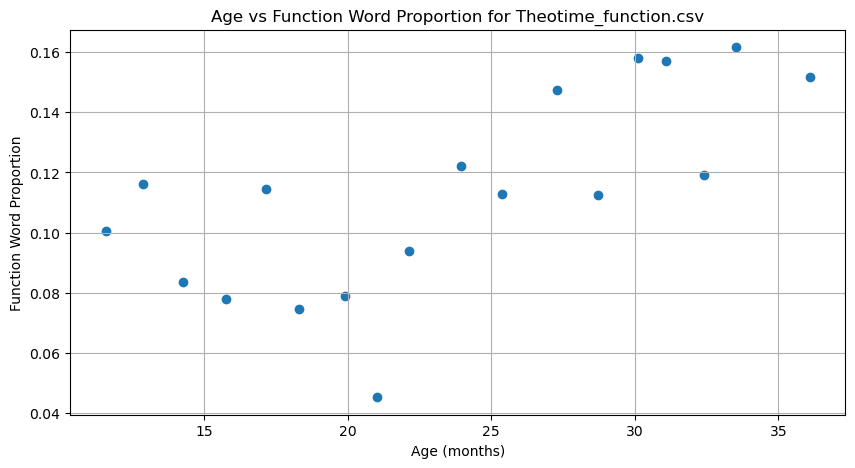

Spearman's rho for Theotime_function.csv: 0.6821

Chosen Transcripts for Theotime_function.csv: 
 ['01117a.cha', '10026a.cha', '10208a.cha', '10323a.cha', '10505a.cha', '10609a.cha', '10727a.cha', '10901a.cha', '11004a.cha', '11128a.cha', '20111a.cha', '20309a.cha', '20422a.cha', '20603a.cha', '20703a.cha', '20812a.cha', '20916a.cha', '30003a.cha'] 

Function Word Proportions for Theotime_function.csv: 
 [0.10047846889952153, 0.11627906976744186, 0.08359133126934984, 0.07796101949025487, 0.11448598130841121, 0.07460035523978685, 0.07888631090487239, 0.04526748971193416, 0.09393939393939393, 0.12199036918138041, 0.11279826464208242, 0.14734774066797643, 0.11245353159851301, 0.15810276679841898, 0.15706806282722513, 0.11917808219178082, 0.16164584864070536, 0.15158636897767333] 

Ages for Theotime_function.csv: 
 [11.566666666666666, 12.866666666666667, 14.266666666666666, 15.766666666666666, 17.166666666666668, 18.3, 19.9, 21.03333333333333, 22.133333333333333, 23.933333333333334, 25.36

In [36]:
age_function_plots(function_files_all, spearman_rhos_all, age_files)

## Spearman's ρ

In [37]:
spearman_rhos_50

[]

In [38]:
spearman_rhos_100

[]

In [39]:
spearman_rhos_all

[['Anae_function.csv', 0.4242735042735042],
 ['Anais_function.csv', 0.5541795665634675],
 ['Anne_function.csv', 0.6794117647058824],
 ['Antoine_function.csv', 0.785221674876847],
 ['Champaud_function.csv', -0.027972027972027972],
 ['Geneva_function.csv', 0.5714285714285715],
 ['Lea_function.csv', 0.09285714285714285],
 ['Leonard_function.csv', 0.8833333333333333],
 ['Leveille_function.csv', -0.2121212121212121],
 ['Madeleine_function.csv', 0.8281335522714832],
 ['Marie_function.csv', 0.6578204404291361],
 ['Marilyn_function.csv', 0.4901098901098901],
 ['Max_function.csv', 0.39780219780219783],
 ['Nathan_function.csv', 0.22794117647058826],
 ['Theophile_function.csv', 0.7558651026392962],
 ['Theotime_function.csv', 0.6821465428276574]]